In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
dfc=pd.read_csv('company.csv')

In [4]:
dfp=pd.read_csv('party.csv')

In [5]:
dfc.head()

,Date of Purchase,Purchaser Name,Denomination,Unnamed: 3
0,12/Apr/2019,A B C INDIA LIMITED,100000,NaN
1,12/Apr/2019,A B C INDIA LIMITED,100000,NaN
2,12/Apr/2019,A B C INDIA LIMITED,1000000,NaN
3,12/Apr/2019,A B C INDIA LIMITED,1000000,NaN
4,12/Apr/2019,A B C INDIA LIMITED,100000,NaN


In [6]:
dfp.head()

,Date of\nEncashment,Name of the Political Party,Denomination,Unnamed: 3
0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000,NaN
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN


In [7]:
company_info = dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date of Purchase  18871 non-null  object 
 1   Purchaser Name    18871 non-null  object 
 2   Denomination      18871 non-null  int64  
 3   Unnamed: 3        0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 589.8+ KB


In [8]:
party_info = dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date of
Encashment           20421 non-null  object 
 1   Name of the Political Party  20421 non-null  object 
 2   Denomination                 20421 non-null  int64  
 3   Unnamed: 3                   0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 638.3+ KB


In [9]:
dfc.columns = ['Date_of_Purchase', 'Purchaser_Name', 'Denomination', 'Unnamed']
dfc

,Date_of_Purchase,Purchaser_Name,Denomination,Unnamed
0,12/Apr/2019,A B C INDIA LIMITED,100000,NaN
1,12/Apr/2019,A B C INDIA LIMITED,100000,NaN
2,12/Apr/2019,A B C INDIA LIMITED,1000000,NaN
3,12/Apr/2019,A B C INDIA LIMITED,1000000,NaN
4,12/Apr/2019,A B C INDIA LIMITED,100000,NaN
...,...,...,...,...
18866,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000,NaN
18867,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000,NaN
18868,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000,NaN
18869,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000,NaN


In [10]:
dfc.drop(columns=['Unnamed'], inplace=True)

In [11]:
dfc.head()

,Date_of_Purchase,Purchaser_Name,Denomination
0,12/Apr/2019,A B C INDIA LIMITED,100000
1,12/Apr/2019,A B C INDIA LIMITED,100000
2,12/Apr/2019,A B C INDIA LIMITED,1000000
3,12/Apr/2019,A B C INDIA LIMITED,1000000
4,12/Apr/2019,A B C INDIA LIMITED,100000


In [12]:
dfp.columns = ['Date_of_Encashment', 'Party', 'Denomination', 'Unnamed']

In [13]:
dfp.drop(columns=['Unnamed'], inplace=True)

In [14]:
dfp.head()

,Date_of_Encashment,Party,Denomination
0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000


In [15]:
import datetime

In [16]:
# Convert 'Date of Purchase' column in both datasets to datetime
dfc['Date_of_Purchase'] = pd.to_datetime(dfc['Date_of_Purchase'])
dfp['Date_of_Encashment'] = pd.to_datetime(dfp['Date_of_Encashment'])

In [17]:
df_merged = dfp.merge(dfc, how='inner')

In [18]:
df_merged['days_difference'] = (df_merged['Date_of_Encashment'] - df_merged['Date_of_Purchase']).dt.days

In [19]:
filtered_df = df_merged[(df_merged['days_difference'] >= 0)&(df_merged['days_difference'] <=15)]

In [20]:
filtered_df

,Date_of_Encashment,Party,Denomination,Date_of_Purchase,Purchaser_Name,days_difference
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019-04-12,A B C INDIA LIMITED,0
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019-04-12,A B C INDIA LIMITED,0
2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019-04-12,A B C INDIA LIMITED,0
3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019-04-12,ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED,0
4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019-04-12,ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED,0
...,...,...,...,...,...,...
172948516,2024-01-24,JANASENA PARTY,1000000,2024-01-11,VIDUR GUPTA,13
172948517,2024-01-24,JANASENA PARTY,1000000,2024-01-11,VIDUR GUPTA,13
172948518,2024-01-24,JANASENA PARTY,1000000,2024-01-11,VIDUR GUPTA,13
172948519,2024-01-24,JANASENA PARTY,1000000,2024-01-11,VIDUR GUPTA,13


In [17]:
filtered_df.to_csv('merged_data.csv', index=False)

NameError: name 'filtered_df' is not defined

In [18]:
customer_data = pd.DataFrame(dfc)

In [19]:
customer_data['Date_of_Purchase'] = pd.to_datetime(customer_data['Date_of_Purchase'])

In [20]:
customer_data['month_year'] = customer_data['Date_of_Purchase'].dt.to_period('M')

In [21]:
monthly_total_denomination = customer_data.groupby(['month_year', 'Purchaser_Name'])['Denomination'].sum().reset_index()

In [22]:
monthly_total_denomination

,month_year,Purchaser_Name,Denomination
0,2019-04,A B C INDIA LIMITED,4000000
1,2019-04,ACE COMERCIAL COMPANY PRIVATE LIMITED,2500000
2,2019-04,ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED,2500000
3,2019-04,ADIT BUILD WELL PVT LTD,10000000
4,2019-04,"AISHWARYA BUSINESS CORPORATION PVT, LTD",50000000
...,...,...,...
1848,2024-01,VIDUR GUPTA,5000000
1849,2024-01,VIHAAN AUTO VENTURES PRIVATE LIMITED,20000000
1850,2024-01,VIKAS PARASRAMPURIA,20000000
1851,2024-01,WESTERN UP POWER TRANSMISSION COMPANY LI MITED,300000000


In [23]:
monthly_total_denomination.sort_values(by=['month_year', 'Purchaser_Name'], inplace=True)

In [41]:
monthly_total_denomination

,month_year,Purchaser_Name,Denomination
0,2019-04,A B C INDIA LIMITED,4000000
1,2019-04,ACE COMERCIAL COMPANY PRIVATE LIMITED,2500000
2,2019-04,ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED,2500000
3,2019-04,ADIT BUILD WELL PVT LTD,10000000
4,2019-04,"AISHWARYA BUSINESS CORPORATION PVT, LTD",50000000
...,...,...,...
1848,2024-01,VIDUR GUPTA,5000000
1849,2024-01,VIHAAN AUTO VENTURES PRIVATE LIMITED,20000000
1850,2024-01,VIKAS PARASRAMPURIA,20000000
1851,2024-01,WESTERN UP POWER TRANSMISSION COMPANY LI MITED,300000000


In [44]:
monthly_total_denomination.to_csv('Monthly_Donation_by_company.csv', index=False)

In [25]:
Party_data = pd.DataFrame(dfp)

In [26]:
Party_data['Date_of_Encashment'] = pd.to_datetime(Party_data['Date_of_Encashment'])

In [27]:
Party_data['month_year'] = Party_data['Date_of_Encashment'].dt.to_period('M')

In [36]:
monthly_denomination_party = Party_data.groupby(['month_year', 'Party'])['Denomination'].sum().reset_index()

In [37]:
monthly_denomination_party

,month_year,Party,Denomination
0,2019-04,AAM AADMI PARTY,2000000
1,2019-04,ADYAKSHA SAMAJVADI PARTY,8400000
2,2019-04,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,60500000
3,2019-04,ALL INDIA TRINAMOOL CONGRESS,177600000
4,2019-04,BHARAT RASHTRA SAMITHI,235500000
...,...,...,...
187,2024-01,SHIVSENA (POLITICAL PARTY),250000000
188,2024-01,SIKKIM DEMOCRATIC FRONT,5000000
189,2024-01,SIKKIM KRANTIKARI MORCHA,30000000
190,2024-01,TELUGU DESAM PARTY,1182000000


In [38]:
monthly_denomination_party.sort_values(by=['month_year', 'Party'], inplace=True)

In [39]:
monthly_denomination_party

,month_year,Party,Denomination
0,2019-04,AAM AADMI PARTY,2000000
1,2019-04,ADYAKSHA SAMAJVADI PARTY,8400000
2,2019-04,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,60500000
3,2019-04,ALL INDIA TRINAMOOL CONGRESS,177600000
4,2019-04,BHARAT RASHTRA SAMITHI,235500000
...,...,...,...
187,2024-01,SHIVSENA (POLITICAL PARTY),250000000
188,2024-01,SIKKIM DEMOCRATIC FRONT,5000000
189,2024-01,SIKKIM KRANTIKARI MORCHA,30000000
190,2024-01,TELUGU DESAM PARTY,1182000000


In [40]:
overall_denomination_party = Party_data.groupby(['Party'])['Denomination'].sum().reset_index()

In [41]:
overall_denomination_party

,Party,Denomination
0,AAM AADMI PARTY,654500000
1,ADYAKSHA SAMAJVADI PARTY,140500000
2,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,60500000
3,ALL INDIA TRINAMOOL CONGRESS,16095314000
4,BHARAT RASHTRA SAMITHI,12147099000
5,BHARTIYA JANTA PARTY,60605111000
6,BIHAR PRADESH JANTA DAL(UNITED),140000000
7,BIJU JANATA DAL,7755000000
8,DMK PARTY IN PARLIAMENT,6390000000
9,GOA FORWARD PARTY,3500000


In [42]:
overall_denomination_by_company = customer_data.groupby(['Purchaser_Name'])['Denomination'].sum().reset_index()

In [43]:
overall_denomination_by_company

,Purchaser_Name,Denomination
0,14 REELS PLUS LLP,10000000
1,A B C INDIA LIMITED,4000000
2,AAKANKSHA BAHETY,1000000
3,AALAYA CONSTRUCTIONS,10000000
4,AARISH SOLAR POWER PRIVATE LIMITED,20000000
...,...,...
1311,YUVAN TRADING CONSULTANCY LLP,50000000
1312,ZENSAR TECHNOLOGIES LTD,30000000
1313,ZUVAN ENERGY PRIVATE LIMITED,10000000
1314,ZUVAN ENERGY PVT LTD,20000000


In [45]:
overall_denomination_party.to_csv('Overall_party_earning.csv', index=False)

In [46]:
overall_denomination_by_company.to_csv('overall_donated_by_company.csv', index=False)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Filter parties with more than 1% earning
total_earning = sum(overall_denomination_party['Denomination'])
filtered_parties = [party for party, denomination in zip(overall_denomination_party['Party'], overall_denomination_party['Denomination']) if (denomination / total_earning) > 0.01]
filtered_denominations = [denomination for denomination in overall_denomination_party['Denomination'] if (denomination / total_earning) > 0.01]

In [75]:
other_earning = sum(overall_denomination_party['Denomination']) - sum(filtered_denominations)

In [96]:
sorted_indices = sorted(range(len(filtered_denominations)), key=filtered_denominations.__getitem__, reverse=True)
sorted_parties = [filtered_parties[i] for i in sorted_indices]
sorted_denominations = [filtered_denominations[i] for i in sorted_indices]

In [89]:
# Prepare data for 'Other' party
if other_earning > 0:
    filtered_parties.append('Other')
    filtered_denominations.append(other_earning)

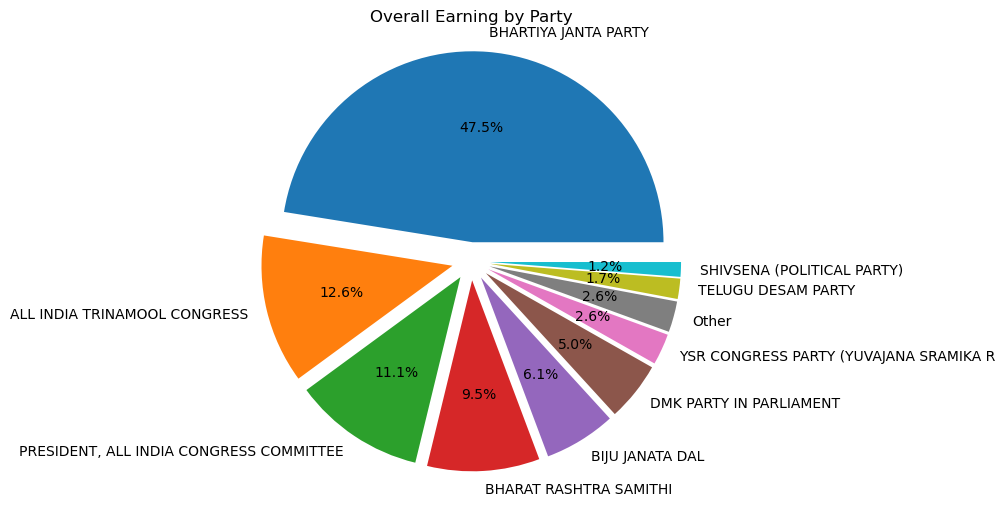

In [99]:
plt.figure(figsize=(10, 6))
plt.pie(sorted_denominations, labels=sorted_parties, autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))

plt.title('Overall Earning by Party')
plt.axis('equal')

plt.show()

In [84]:
total_expence = sum(overall_denomination_by_company['Denomination'])
filtered_companies = [company for company, denomination in zip(overall_denomination_by_company['Purchaser_Name'], overall_denomination_by_company['Denomination']) if (denomination / total_expence) > 0.01]
filtered_donation = [denomination for denomination in overall_denomination_by_company['Denomination'] if (denomination / total_expence) > 0.01]

In [86]:
other_expence = sum(overall_denomination_by_company['Denomination']) - sum(filtered_donation)

In [87]:

if other_earning > 0:
    filtered_companies.append('Other')
    filtered_donation.append(other_expence)

In [107]:
sorted_indice = sorted(range(len(filtered_donation)), key=filtered_donation.__getitem__)
sorted_companies = [filtered_companies[i] for i in sorted_indice]
sorted_donation = [filtered_donation[i] for i in sorted_indice]

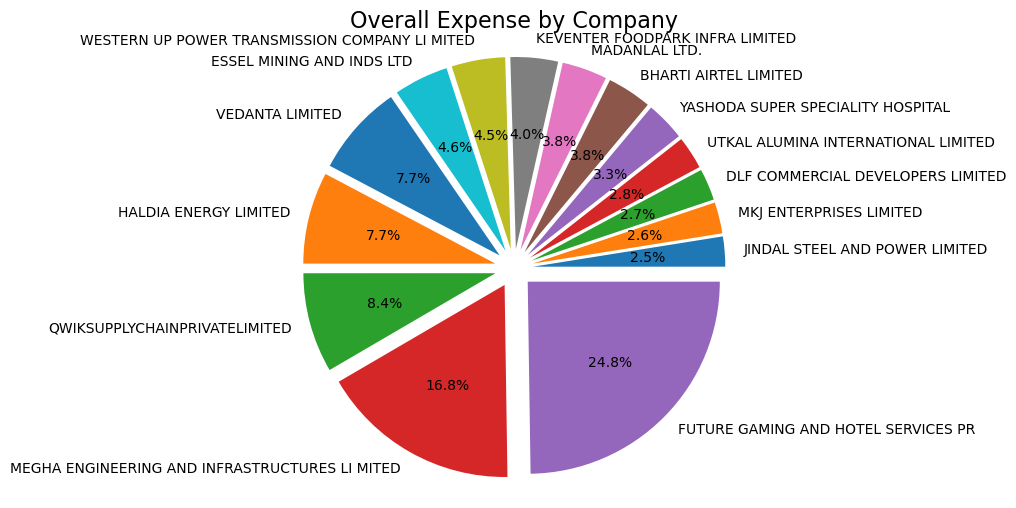

In [113]:
plt.figure(figsize=(10, 6))
plt.pie(sorted_donation, labels=sorted_companies, autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))

plt.title('Overall Expense by Company',fontsize=16)
plt.axis('equal')

plt.show()